Dataset Preview:


,Year,ICD10 Code,ICD10 Diagnosis,Diagnosis Type,Metric,Sex,Value
0,2014/15,All codes,All admissions,All admissions,Number of admissions,NaN,11011882
1,2014/15,C33-C34 & C00-C14 & C15 & C32 & C53 & C67 & C6...,All diseases which can be caused by smoking,All diseases which can be caused by smoking,Number of admissions,NaN,1713330
2,2014/15,C00-D48,All cancers,All cancers,Number of admissions,NaN,1691035
3,2014/15,J00-J99,All respiratory diseases,All respiratory diseases,Number of admissions,NaN,611002
4,2014/15,I00-I99,All circulatory diseases,All circulatory diseases,Number of admissions,NaN,907157



Missing Values Summary:
Year                 0
ICD10 Code           0
ICD10 Diagnosis      0
Diagnosis Type       0
Metric               0
Sex                693
Value                1
dtype: int64

Dataset Summary:
              Year         Value
count  2038.000000  2.038000e+03
mean   2009.009323  1.920622e+05
std       3.168390  8.523102e+05
min    2004.000000  0.000000e+00
25%    2006.000000  4.710250e+03
50%    2009.000000  1.322700e+04
75%    2012.000000  5.817750e+04
max    2014.000000  1.101188e+07

Total Admissions by Year:
Year
2004    27884101.0
2005    29171161.0
2006    29918897.0
2007    30868210.0
2008    40411097.0
2009    33435524.0
2010    24395117.0
2011    35136926.0
2012    35606706.0
2013    36649436.0
2014    38216910.0
Name: Value, dtype: float64

Admissions by Disease Type:
Diagnosis Type
All admissions                                              199455159.0
All cancers                                                  34219854.0
All circulatory diseases     

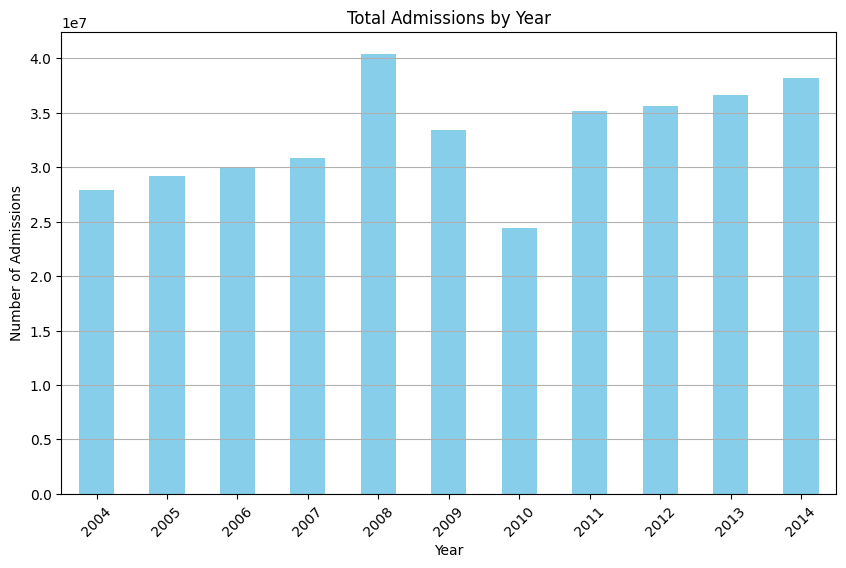

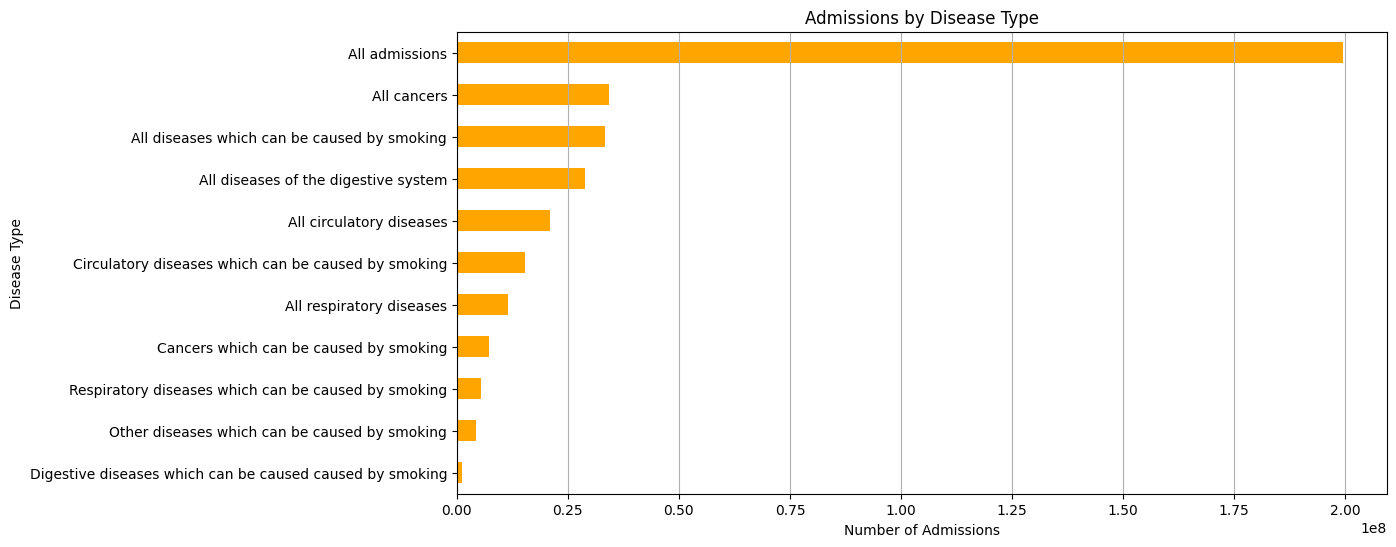

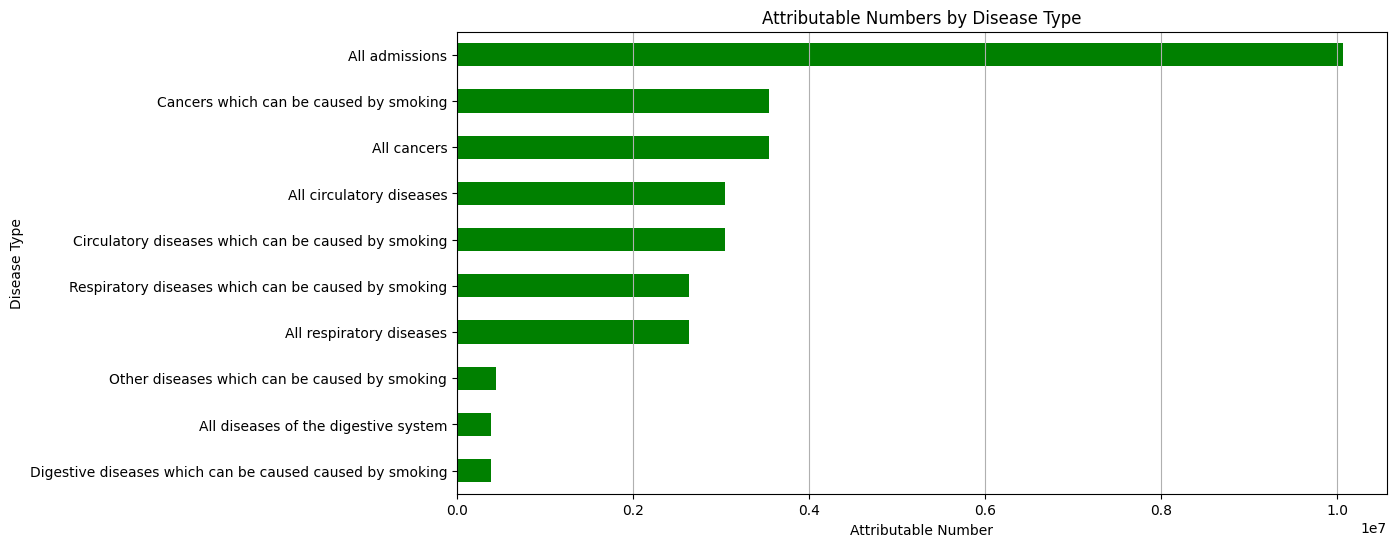


Admissions by Sex:
Sex
Female      94286370.0
Male        91567001.0
Unknown    175840714.0
Name: Value, dtype: float64


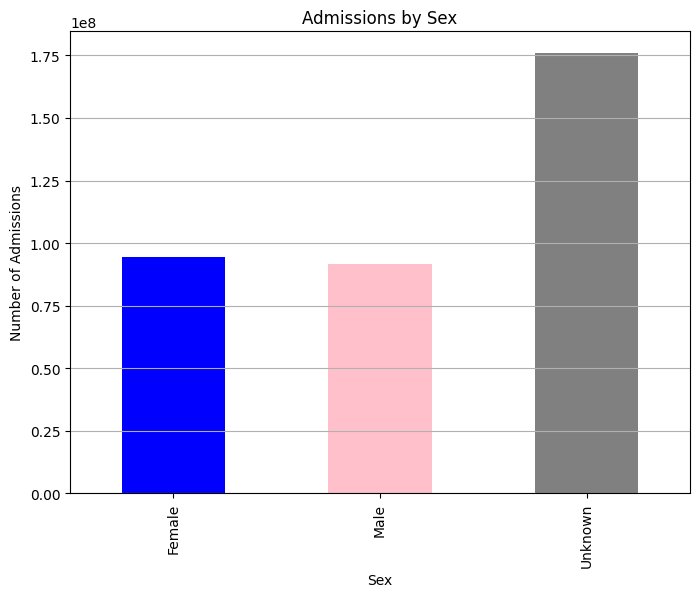

Cleaned dataset saved to cleaned_dataset.csv


In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Replace 'dataset.csv' with the path to your file
file_path = "/content/admissions.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
display(df.head())

# Data Cleaning
# Checking for missing values
print("\nMissing Values Summary:")
print(df.isnull().sum())

# Fill or drop missing values if needed (example: filling empty sex column with "Unknown")
df['Sex'] = df['Sex'].fillna('Unknown')

# Ensure numerical columns are correctly typed
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Drop rows with invalid numeric data in 'Value'
df = df.dropna(subset=['Value'])

# Convert 'Year' into a consistent format (e.g., using only the starting year)
df['Year'] = df['Year'].str.split('/').str[0].astype(int)

# Summary statistics
print("\nDataset Summary:")
print(df.describe())

# Exploratory Data Analysis (EDA)
# Total admissions by year
admissions_by_year = df[df['Metric'] == 'Number of admissions'].groupby('Year')['Value'].sum()

print("\nTotal Admissions by Year:")
print(admissions_by_year)

# Admissions by disease type
disease_type_admissions = df[df['Metric'] == 'Number of admissions'].groupby('Diagnosis Type')['Value'].sum()

print("\nAdmissions by Disease Type:")
print(disease_type_admissions)

# Attributable numbers by disease type
disease_type_attributable = df[df['Metric'] == 'Attributable number'].groupby('Diagnosis Type')['Value'].sum()

print("\nAttributable Numbers by Disease Type:")
print(disease_type_attributable)

# Visualizations
# 1. Admissions by year
plt.figure(figsize=(10, 6))
admissions_by_year.plot(kind='bar', color='skyblue')
plt.title("Total Admissions by Year")
plt.xlabel("Year")
plt.ylabel("Number of Admissions")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 2. Admissions by disease type
plt.figure(figsize=(12, 6))
disease_type_admissions.sort_values().plot(kind='barh', color='orange')
plt.title("Admissions by Disease Type")
plt.xlabel("Number of Admissions")
plt.ylabel("Disease Type")
plt.grid(axis='x')
plt.show()

# 3. Attributable numbers by disease type
plt.figure(figsize=(12, 6))
disease_type_attributable.sort_values().plot(kind='barh', color='green')
plt.title("Attributable Numbers by Disease Type")
plt.xlabel("Attributable Number")
plt.ylabel("Disease Type")
plt.grid(axis='x')
plt.show()

# Additional insights
# Distribution of values across sexes
admissions_by_sex = df[df['Metric'] == 'Number of admissions'].groupby('Sex')['Value'].sum()

print("\nAdmissions by Sex:")
print(admissions_by_sex)

# Plot admissions by sex
plt.figure(figsize=(8, 6))
admissions_by_sex.plot(kind='bar', color=['blue', 'pink', 'gray'])
plt.title("Admissions by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Admissions")
plt.grid(axis='y')
plt.show()

# Save cleaned data for further analysis
cleaned_file_path = "cleaned_dataset.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")
